In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [47]:
np.random.seed(42)
n_components = 10_000
mean_weight = 50
std_dev_weight = 2
weights = np.random.normal(mean_weight, std_dev_weight, n_components)
weights

array([50.99342831, 49.7234714 , 51.29537708, ..., 48.58936655,
       50.99153115, 51.28877691])

In [48]:
max_weiht = np.max(weights)
min_weight = np.min(weights)

print(f"Max weight: {max_weiht:.2f}")
print(f"Min weight: {min_weight:.2f}")

Max weight: 57.85
Min weight: 42.16


In [57]:
defect_probability = 0.02
defects = np.random.choice([0, 1], size=n_components, p=[1-defect_probability, defect_probability])


data = pd.DataFrame({'Weight': weights, 'Defects': defects})


In [58]:
print(data.head(50))

       Weight  Defects
0   50.993428        0
1   49.723471        0
2   51.295377        0
3   53.046060        0
4   49.531693        0
5   49.531726        0
6   53.158426        0
7   51.534869        0
8   49.061051        0
9   51.085120        0
10  49.073165        0
11  49.068540        0
12  50.483925        0
13  46.173440        0
14  46.550164        0
15  48.875425        0
16  47.974338        0
17  50.628495        0
18  48.183952        0
19  47.175393        0
20  52.931298        0
21  49.548447        0
22  50.135056        0
23  47.150504        0
24  48.911235        1
25  50.221845        0
26  47.698013        0
27  50.751396        0
28  48.798723        0
29  49.416613        0
30  48.796587        0
31  53.704556        0
32  49.973006        0
33  47.884578        0
34  51.645090        0
35  47.558313        0
36  50.417727        0
37  46.080660        0
38  47.343628        0
39  50.393722        0
40  51.476933        0
41  50.342737        0
42  49.7687

In [60]:
count_zero = (data['Defects'] == 0).sum()
count_one = (data['Defects'] == 1).sum()

percentege_zero = count_zero / n_components * 100
percentege_one = count_one / n_components * 100

print(f" Cantidad de componentes sin defectos: {count_zero}")
print(f" Cantidad de componentes con defectos: {count_one}")
print(f" Porcentaje de componentes sin defectos: {percentege_zero:.2f}%")
print(f" Porcentaje de componentes con defectos: {percentege_one:.2f}%")

 Cantidad de componentes sin defectos: 9794
 Cantidad de componentes con defectos: 206
 Porcentaje de componentes sin defectos: 97.94%
 Porcentaje de componentes con defectos: 2.06%


In [61]:
print("Estadisticas descriptivas")
print(data.describe())

Estadisticas descriptivas
             Weight       Defects
count  10000.000000  10000.000000
mean      49.995728      0.020600
std        2.006925      0.142048
min       42.155199      0.000000
25%       48.654819      0.000000
50%       49.994810      0.000000
75%       51.342162      0.000000
max       57.852475      1.000000


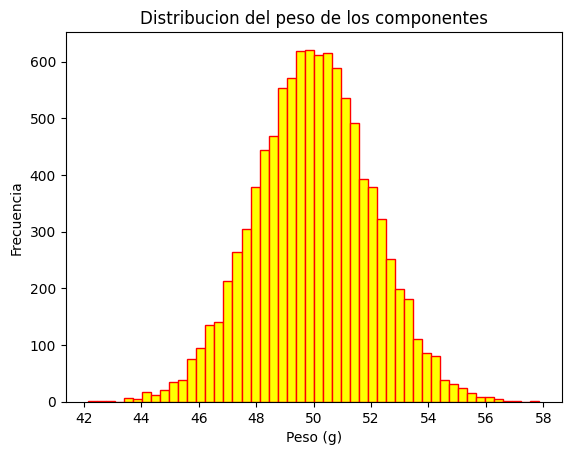

In [62]:
plt.hist(data['Weight'], bins=50, color='yellow', edgecolor='red')
plt.title('Distribucion del peso de los componentes')
plt.xlabel('Peso (g)')
plt.ylabel("Frecuencia")
plt.show()

In [70]:
weight_df = pd.DataFrame(weights, columns=['Weight'])
defects_df = pd.DataFrame(defects, columns=['Defects'])

sample_2 = np.array([np.random.choice(weights, size=30, replace=False) for _ in range(1000)])

combined_samples = sample_2.flatten()
combiend_samples_df = pd.DataFrame(combined_samples, columns = ["30 Mil Samples"])

final_df = pd.concat([weight_df, defects_df, combiend_samples_df], axis=1)

final_df.to_csv('final.csv', index=False)

print("Los datos se han guardado en el archivo final_df.xlsx")

Los datos se han guardado en el archivo final_df.xlsx


In [71]:
print(final_df.describe())

             Weight       Defects  30 Mil Samples
count  10000.000000  10000.000000    30000.000000
mean      49.995728      0.020600       50.013185
std        2.006925      0.142048        2.011694
min       42.155199      0.000000       42.155199
25%       48.654819      0.000000       48.666303
50%       49.994810      0.000000       50.008460
75%       51.342162      0.000000       51.363001
max       57.852475      1.000000       57.852475


In [73]:
def full_stats(df):
    return df.describe().T.assign(
        skew=df.skew(),
        kurtosis=df.kurtosis(),
        variance=df.var(),
        unique=df.nunique(),
    )

print(full_stats(final_df))

                  count       mean       std        min        25%       50%  \
Weight          10000.0  49.995728  2.006925  42.155199  48.654819  49.99481   
Defects         10000.0   0.020600  0.142048   0.000000   0.000000   0.00000   
30 Mil Samples  30000.0  50.013185  2.011694  42.155199  48.666303  50.00846   

                      75%        max      skew   kurtosis  variance  unique  
Weight          51.342162  57.852475  0.001964   0.027093  4.027747   10000  
Defects          0.000000   1.000000  6.751177  43.587113  0.020178       2  
30 Mil Samples  51.363001  57.852475 -0.010480  -0.003568  4.046914    9527  


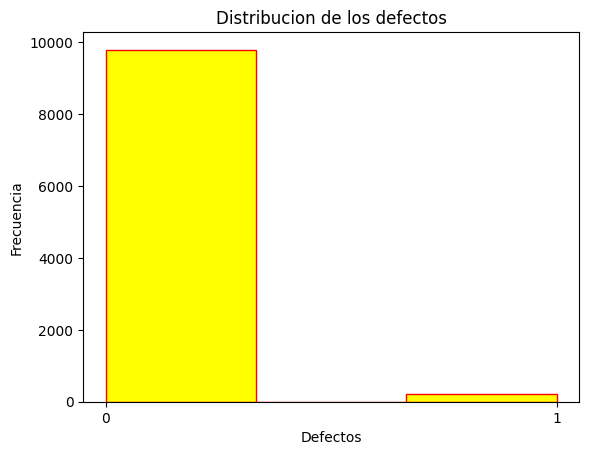

In [84]:
from typing import final


plt.hist(final_df['Defects'], bins=3, color='yellow', edgecolor='red')
plt.xticks([0, 1])
plt.title('Distribucion de los defectos')
plt.xlabel('Defectos')
plt.ylabel("Frecuencia")
plt.show()

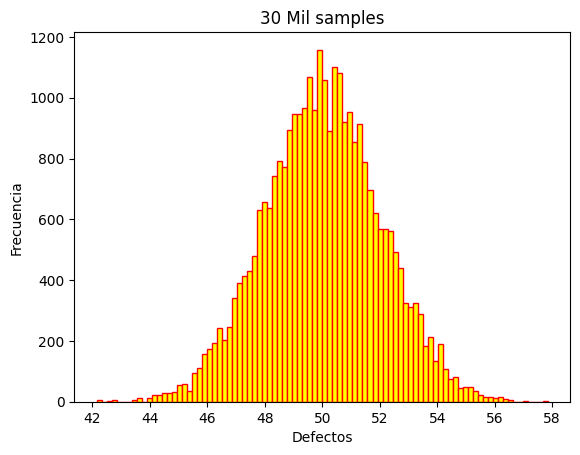

In [77]:
plt.hist(final_df['30 Mil Samples'], bins=90, color='yellow', edgecolor='red')
plt.title('30 Mil samples')
plt.xlabel('Defectos')
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
sample2 = [np.mean(np.random.choice(weights, size=30, replace=False)) for _ in range(1_000)]
sample_means = [np.mean(sample3) for sample3 in sample]

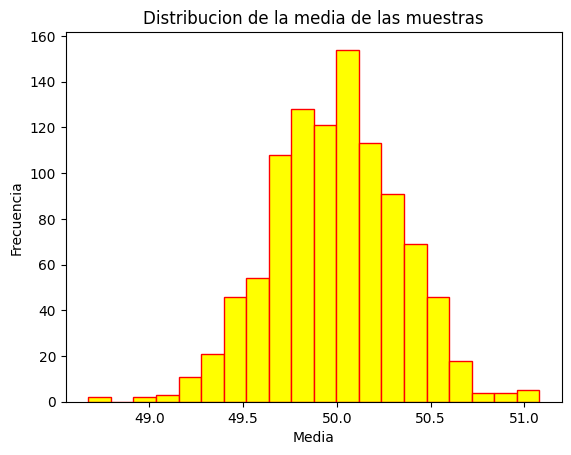

In [107]:
plt.hist(sample_means, bins=20, color='yellow', edgecolor='red')
plt.title('Distribucion de la media de las muestras')
plt.xlabel('Media')
plt.ylabel("Frecuencia")
plt.show()

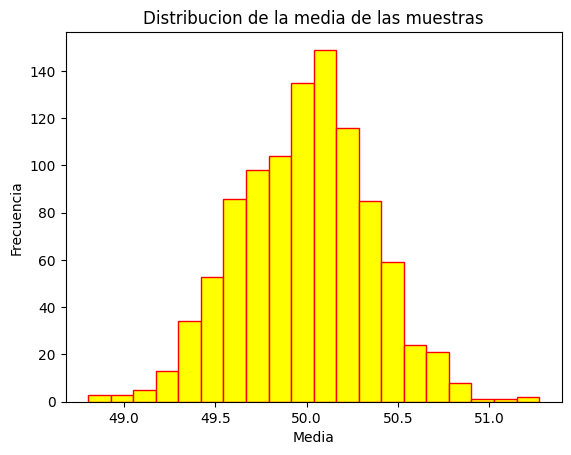

In [106]:
plt.hist(sample2, bins=20, color='yellow', edgecolor='red')
plt.title('Distribucion de la media de las muestras')
plt.xlabel('Media')
plt.ylabel("Frecuencia")
plt.show()

In [102]:
df_sample2 = pd.DataFrame(sample2)

df_sample2.to_csv('sample2.csv', index=False, header=False)

print("Los datos se han guardado en el archivo sample2.csv")

Los datos se han guardado en el archivo sample2.csv


In [114]:
df_sample3 = pd.DataFrame(sample_means)

df_sample3.to_csv('sample_means.csv', index=False, header=False)

print("Los datos se han guardado en el archivo sample_means.csv")

Los datos se han guardado en el archivo sample_means.csv


In [122]:
confidence_level = 0.95
sampli = np.random.choice(weights, size=30, replace=False)
sampli_mean = np.mean(sampli)
sampli_std = np.std(sampli, ddof=1)

In [123]:
margin_of_erro = stats.t.ppf((1 + confidence_level) / 2, df=len(sampli) - 1) * (sampli_std / np.sqrt(len(sampli)))
print(f"Media muestral: {sampli_mean:.2f}, Intervalo de confianza al 95%: [{sampli_mean - margin_of_erro:.2f}, {sampli_mean + margin_of_erro:.2f}]")

Media muestral: 50.03, Intervalo de confianza al 95%: [49.29, 50.77]


In [ ]:
prob_x_greater_52 = stats.norm.cdf(52, loc=mean_weight, scale=std_dev_weight)
print(f"Probabilidad de que un componente pese mas de 52g: {prob_x_greater_52:.4f}")

Probabilidad de que un componente pese mas de 52g: 0.8413
